# Data Scientist Salaries

Using H-1B salary data to research salary trends and statistics in the data science profession.
Initial research conducted by Tony Yiu. I am just continuing his work.
https://towardsdatascience.com/how-much-do-data-scientists-make-cbd7ec2b458

In [1]:
# import libraries
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re

In [2]:
# links to data from some of biggest tech cities
links = [
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SAN+FRANCISCO&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SAN+JOSE&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SANTA+CLARA&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SUNNYVALE&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=MOUNTAIN+VIEW&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=CUPERTINO&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=MENLO+PARK&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=PALO+ALTO&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=REDWOOD+CITY&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SAN+MATEO&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SEATTLE&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=REDMOND&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SANTA+MONICA&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=LOS+ANGELES&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=AUSTIN&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=DENVER&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=NEW+YORK&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=BELLEVUE&year=All+Years',
    'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=EAST+PALO+ALTO&year=All+Years',
    'https://h1bdata.info/index.php?em=amazon&job=Data+Scientist+I&city=&year=All+Years'
]

# Helper funcitons
def get_company(soup):
    return soup.find('a').text

def get_salary(soup):
    return soup.find_all('td')[2].text
    
def get_city(soup):
    return soup.find_all('a')[2].text
    
def get_year(soup):
    return soup.find_all('td')[4].text[-4:]

# Scrape tables from links and store data
companies = []
salaries = []
cities = []
years = []
for link in links:
    page = BeautifulSoup(requests.get(link).content)
    for row in page.find_all('tr')[1:]:
        companies.append(get_company(row))
        salaries.append(get_salary(row))
        cities.append(get_city(row))
        years.append(get_year(row))

In [3]:
# Turn data into dataframe
ds_data = pd.DataFrame()
ds_data['company'] = companies
ds_data['salary'] = salaries
ds_data['city'] = cities
ds_data['year'] = years
ds_data.head()

,company,salary,city,year
0,SQUARE INC,"79,260","SAN FRANCISCO, CA",2017
1,UBER TECHNOLOGIES INC,"63,814","SAN FRANCISCO, CA",2017
2,UBER TECHNOLOGIES INC,"63,814","SAN FRANCISCO, CA",2017
3,HOTWIRE INC,"63,814","SAN FRANCISCO, CA",2017
4,HOTWIRE INC,"63,814","SAN FRANCISCO, CA",2017


In [5]:
# Basic EDA
display(ds_data.dtypes)

# Convert salary and year to ints dtype
ds_data['salary'] = pd.to_numeric(ds_data['salary'].str.replace(',', ''))
ds_data['year'] = pd.to_numeric(ds_data['year'])

# Drop pre-2014 data
ds_data.drop(ds_data[ds_data['year'] < 2014].index, inplace=True)
# Drop salaries greater than $1,000,000
ds_data.drop(ds_data[ds_data['salary'] > 1000000].index, inplace=True)
# Sort data by year and company
ds_data.sort_values(by=['year','company'], inplace=True, ascending=True)


company    object
salary     object
city       object
year       object
dtype: object

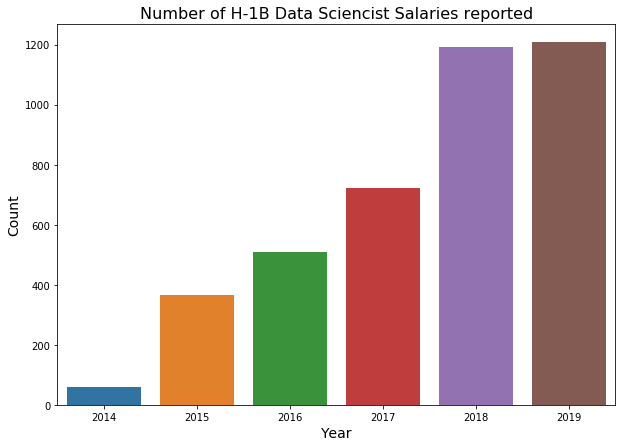

In [6]:
# Plot of number of Data Sciencist reported salaries each year in H1B reports
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(ds_data['year'])
ax.set_title('Number of H-1B Data Sciencist Salaries reported', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.savefig('figures/job_counts', dpi=150)
plt.show()

,year,salary
0,2014,120000
1,2015,115000
2,2016,115000
3,2017,115211
4,2018,122158
5,2019,125000


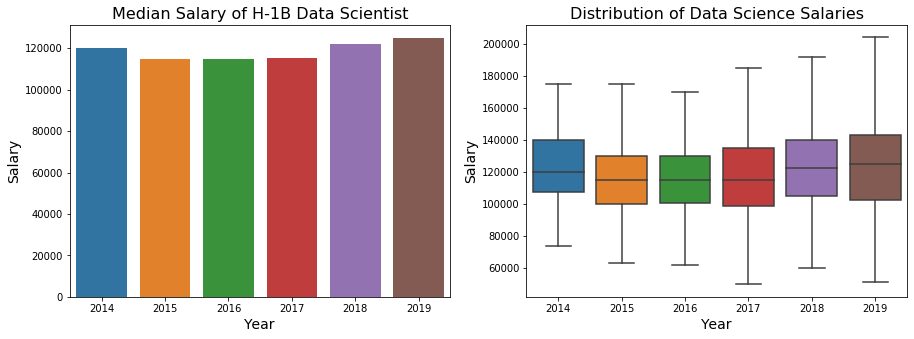

In [7]:
# Average salary by year
median_salary = ds_data.groupby(['year']).median().reset_index()
display(median_salary)

# plot median salary
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(median_salary['year'], median_salary['salary'], ax=ax[0])
sns.boxplot(x='year', y='salary', data=ds_data, showfliers=False, ax=ax[1])

ax[0].set_title('Median Salary of H-1B Data Scientist', fontsize=16)
ax[0].set_xlabel('Year', fontsize=14)
ax[0].set_ylabel('Salary', fontsize=14)
ax[1].set_title('Distribution of Data Science Salaries', fontsize=16)
ax[1].set_xlabel('Year', fontsize=14)
ax[1].set_ylabel('Salary', fontsize=14)

plt.savefig('figures/median_salary', dpi=150)
plt.show()

Median Salary: $120,000.00


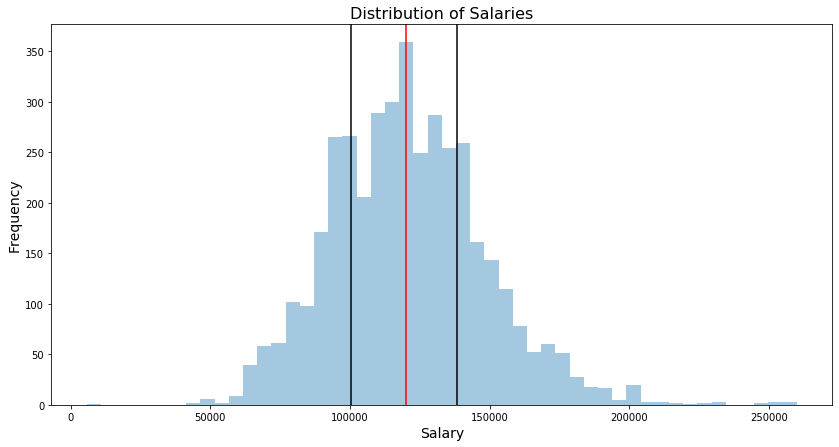

In [8]:
# Histogram of salaries
fig, ax = plt.subplots(figsize=(14,7))

sns.distplot(ds_data['salary'], kde=False)
plt.axvline(ds_data['salary'].quantile(.25), c='black')
plt.axvline(ds_data['salary'].quantile(.50), c='red')
plt.axvline(ds_data['salary'].quantile(.75), c='black')

ax.set_xlabel('Salary', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of Salaries', fontsize=16)
plt.savefig('figures/salary_dist', dpi=150)

print('Median Salary: ${:,.2f}'.format(ds_data['salary'].quantile(.50)))
plt.show()

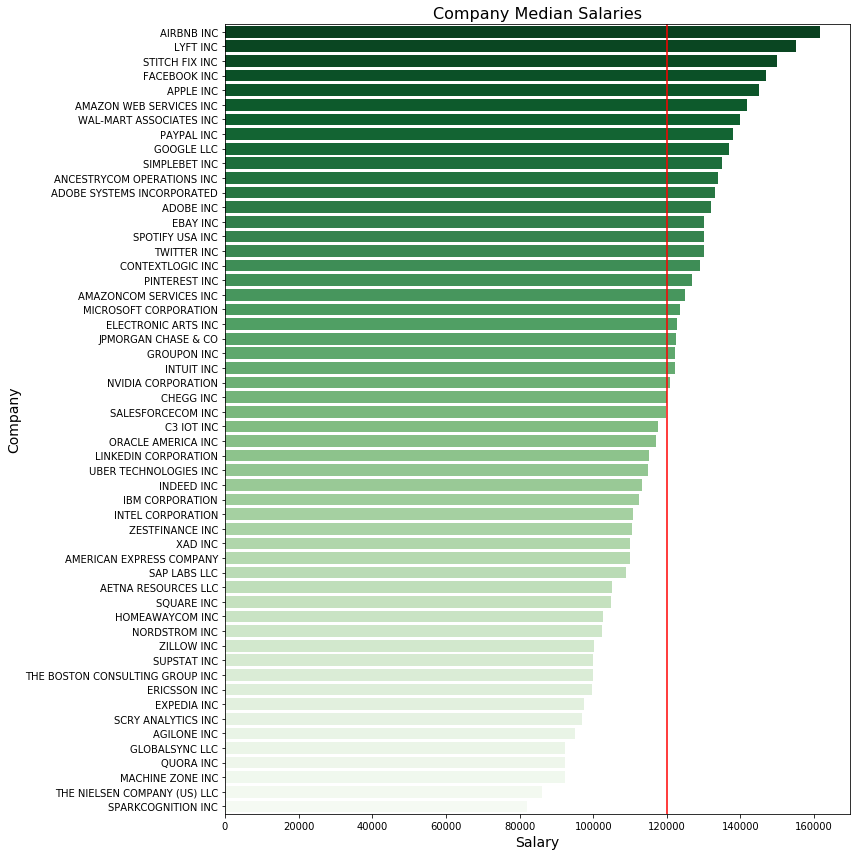

In [9]:
# Lets plot all the companies by wage
company_data = ds_data[['company', 'salary']].groupby(['company']).median().reset_index() # groupby company
company_data['obs'] = ds_data[['company', 'salary']].groupby(['company']).count()['salary'].values # number of obs
company_data.drop(company_data[company_data['obs'] < 10].index, inplace=True) # drop if less than 10 obs
company_data.sort_values(['salary'], inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(12,12))
pal = sns.color_palette("Greens", len(company_data))
sns.barplot(x='salary', y='company', data=company_data, palette=np.array(pal[::-1]))
plt.axvline(120000, c='red')

ax.set_title('Company Median Salaries', fontsize=16)
ax.set_xlabel('Salary', fontsize=14)
ax.set_ylabel('Company', fontsize=14)
fig.tight_layout()
plt.savefig('figures/company_median_salary', dpi=150)

plt.show()

In [10]:
# Table of data above
company_data.head(10)

,company,salary,obs
48,AIRBNB INC,161550.0,110
567,LYFT INC,155000.0,51
866,STITCH FIX INC,150000.0,32
361,FACEBOOK INC,147000.0,372
97,APPLE INC,145000.0,48
74,AMAZON WEB SERVICES INC,141781.0,19
994,WAL-MART ASSOCIATES INC,140000.0,65
700,PAYPAL INC,138000.0,27
426,GOOGLE LLC,137000.0,72
821,SIMPLEBET INC,135000.0,12


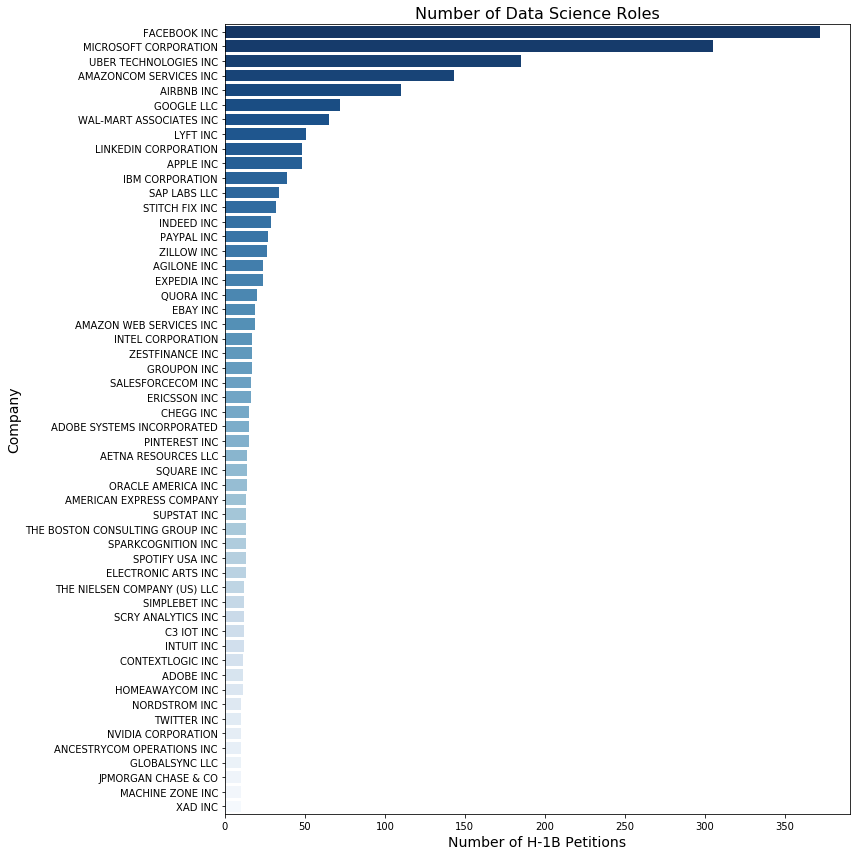

In [11]:
# Companies offering most data science roles
company_data.sort_values(['obs'], inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(12,12))
pal = sns.color_palette("Blues", len(company_data))
sns.barplot(x='obs', y='company', data=company_data, palette=np.array(pal[::-1]))

ax.set_title('Number of Data Science Roles', fontsize=16)
ax.set_xlabel('Number of H-1B Petitions', fontsize=14)
ax.set_ylabel('Company', fontsize=14)
fig.tight_layout()
plt.savefig('figures/company_hiring', dpi=150)

plt.show()

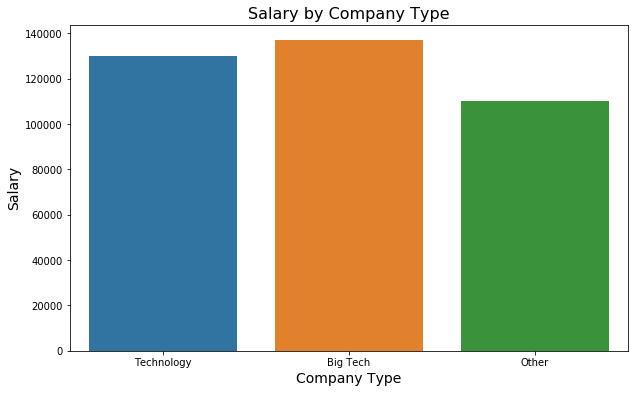

In [12]:
# Compare big tech vs others
company_data['company'].unique()

tech = ['AIRBNB INC', 'LYFT INC', 'STITCH FIX INC', 'FACEBOOK INC', 'APPLE INC',
        'AMAZON WEB SERVICES INC', 'PAYPAL INC', 'GOOGLE LLC', 'ADOBE INC', 
        'ADOBE SYSTEMS INCORPORATED', 'EBAY INC', 'SPOTIFY USA INC', 'TWITTER INC', 
        'PINTEREST INC', 'AMAZONCOM SERVICES INC', 'MICROSOFT CORPORATION',
        'SALESFORCECOM INC', 'LINKEDIN CORPORATION', 'UBER TECHNOLOGIES INC',
        'SQUARE INC', 'QUORA INC']
big_tech = ['FACEBOOK INC', 'APPLE INC', 'AMAZON WEB SERVICES INC', 'GOOGLE LLC', 'TWITTER INC', 
           'AMAZONCOM SERVICES INC', 'MICROSOFT CORPORATION']

tech_salary = company_data[company_data['company'].isin(tech)]['salary'].median()
big_tech_salary = company_data[company_data['company'].isin(big_tech)]['salary'].median()
non_tech_salary = company_data[~company_data['company'].isin(tech)]['salary'].median()

tech_df = pd.DataFrame()
tech_df['companies'] = ['Technology', 'Big Tech', 'Other']
tech_df['salary'] = [tech_salary, big_tech_salary, non_tech_salary]

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='companies', y='salary', data=tech_df)
ax.set_title('Salary by Company Type', fontsize=16)
ax.set_xlabel('Company Type', fontsize=14)
ax.set_ylabel('Salary', fontsize=14)
plt.savefig('figures/company_type', dpi=150)

plt.show()

,Area,Salary
0,Bay Area,125000.0
1,Other Cities,113152.0


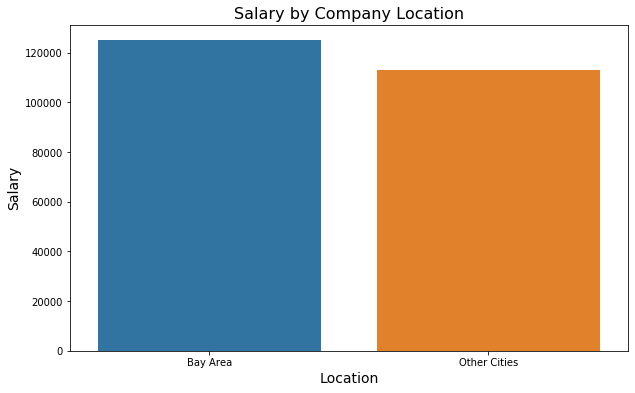

In [13]:
# Bay Area vs Other locations
bay_area = ['SAN FRANCISCO, CA', 'MENLO PARK, CA', 'REDWOOD CITY, CA', 'MOUNTAIN VIEW, CA', 'SAN JOSE, CA',
            'SANTA CLARA, CA', 'PALO ALTO, CA', 'SUNNYVALE, CA', 'SAN MATEO, CA', 'CUPERTINO, CA', 
            'EAST PALO ALTO, CA']

bay_salary = ds_data[ds_data['city'].isin(bay_area)].salary.median()
no_bay_salary = ds_data[~ds_data['city'].isin(bay_area)].salary.median()
location_df = pd.DataFrame()
location_df['Area'] = ['Bay Area', 'Other Cities']
location_df['Salary'] = [bay_salary, no_bay_salary]

# plot differences between bay area and other places
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Area', y='Salary', data=location_df)
ax.set_title('Salary by Company Location', fontsize=16)
ax.set_xlabel('Location', fontsize=14)
ax.set_ylabel('Salary', fontsize=14)
plt.savefig('figures/salary_location', dpi=150)
display(location_df)
plt.show()